In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff

In [2]:
df = pd.read_csv('./data/activities_20201001.csv')
df

,Activity Type,Date,Favorite,Title,Distance,Calories,Time,Avg HR,Max HR,Aerobic TE,...,Grit,Flow,Climb Time,Bottom Time,Min Temp,Surface Interval,Decompression,Best Lap Time,Number of Laps,Max Temp
0,Running,2020-10-01 23:42:43,False,West Coast,12.01,628,01:19:02,165,186,3.7,...,0,0,1:19:02,0:00,29,0:00,No,00:02.02,13,0
1,Running,2020-09-28 23:08:06,False,West Coast,12.01,674,01:22:05,170,184,3.9,...,0,0,1:22:05,0:00,30,0:00,No,00:02.06,13,0
2,Other,2020-09-27 19:55:18,False,Table Tennis,0.00,612,01:55:53,140,180,3.1,...,0,0,1:55:53,0:00,28,0:00,No,01:55:53.43,1,0
3,Running,2020-09-24 23:40:59,False,West Coast,8.01,470,00:54:08,171,185,3.6,...,0,0,54:08,0:00,30,0:00,No,00:02.43,9,0
4,Other,2020-09-23 19:59:19,False,Table Tennis,0.00,873,01:51:55,156,171,3.6,...,0,0,1:51:55,0:00,31,0:00,No,01:51:55.17,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,Running,2017-12-20 18:45:50,False,Marina Bay,3.95,--,00:23:55,178,194,--,...,0,0,23:55,0:00,0,0:00,No,00:00.00,1,0
366,Running,2017-12-08 18:20:38,False,Marina Bay,5.02,--,00:29:17,--,--,--,...,0,0,29:17,0:00,0,0:00,No,00:00.00,1,0
367,Running,2017-12-05 18:17:43,False,Marina Bay,4.61,--,00:28:19,--,--,--,...,0,0,28:19,0:00,0,0:00,No,00:00.00,1,0
368,Running,2017-11-30 18:16:51,False,Marina Bay,3.21,--,00:19:14,--,--,--,...,0,0,19:14,0:00,0,0:00,No,00:00.00,1,0


In [3]:
df.columns

Index(['Activity Type', 'Date', 'Favorite', 'Title', 'Distance', 'Calories',
       'Time', 'Avg HR', 'Max HR', 'Aerobic TE', 'Avg Run Cadence',
       'Max Run Cadence', 'Avg Pace', 'Best Pace', 'Elev Gain', 'Elev Loss',
       'Avg Stride Length', 'Avg Vertical Ratio', 'Avg Vertical Oscillation',
       'Avg Ground Contact Time', 'Avg GCT Balance', 'Avg Run Cadence.1',
       'Max Run Cadence.1', 'Training Stress Score®', 'Grit', 'Flow',
       'Climb Time', 'Bottom Time', 'Min Temp', 'Surface Interval',
       'Decompression', 'Best Lap Time', 'Number of Laps', 'Max Temp'],
      dtype='object')

In [4]:
# Drop irrelevant columns, and replace all missing data with np.nan.

relevant_columns = [
    'Activity Type', 'Date', 'Title', 'Distance', 'Calories', 'Time', 'Avg HR', 
    'Max HR', 'Aerobic TE', 'Avg Run Cadence', 'Avg Pace', 'Elev Gain', 
    'Elev Loss', 'Avg Stride Length', 'Min Temp'
]

df = df[relevant_columns]

df = df.applymap(lambda x: np.nan if x == '--' else x)

df

,Activity Type,Date,Title,Distance,Calories,Time,Avg HR,Max HR,Aerobic TE,Avg Run Cadence,Avg Pace,Elev Gain,Elev Loss,Avg Stride Length,Min Temp
0,Running,2020-10-01 23:42:43,West Coast,12.01,628,01:19:02,165,186,3.7,154,6:35,38,21,0.98,29
1,Running,2020-09-28 23:08:06,West Coast,12.01,674,01:22:05,170,184,3.9,153,6:50,30,28,0.95,30
2,Other,2020-09-27 19:55:18,Table Tennis,0.00,612,01:55:53,140,180,3.1,8,NaN,NaN,NaN,0.00,28
3,Running,2020-09-24 23:40:59,West Coast,8.01,470,00:54:08,171,185,3.6,154,6:46,17,16,0.96,30
4,Other,2020-09-23 19:59:19,Table Tennis,0.00,873,01:51:55,156,171,3.6,8,NaN,NaN,NaN,0.00,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,Running,2017-12-20 18:45:50,Marina Bay,3.95,NaN,00:23:55,178,194,NaN,NaN,6:03,89,120,0.00,0
366,Running,2017-12-08 18:20:38,Marina Bay,5.02,NaN,00:29:17,NaN,NaN,NaN,NaN,5:50,111,107,0.00,0
367,Running,2017-12-05 18:17:43,Marina Bay,4.61,NaN,00:28:19,NaN,NaN,NaN,NaN,6:08,69,97,0.00,0
368,Running,2017-11-30 18:16:51,Marina Bay,3.21,NaN,00:19:14,NaN,NaN,NaN,NaN,6:00,9,43,0.00,0


In [5]:
df.dtypes

Activity Type         object
Date                  object
Title                 object
Distance             float64
Calories              object
Time                  object
Avg HR                object
Max HR                object
Aerobic TE            object
Avg Run Cadence       object
Avg Pace              object
Elev Gain             object
Elev Loss             object
Avg Stride Length    float64
Min Temp               int64
dtype: object

In [42]:
# Parse date and timedelta columns.
df.Date = pd.to_datetime(df.Date)
df['Time'] = pd.to_timedelta(df['Time'])

# Add in a 'Year', 'Month' and 'Hour' columns.
df['Year'] = pd.DatetimeIndex(df['Date']).year
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Hour'] = pd.DatetimeIndex(df['Date']).hour

# Change column types.
col_types = {
    'Activity Type': 'category',
    'Title': 'category',
    'Calories': 'float64',
    'Avg HR': 'float64',
    'Max HR': 'float64',
    'Aerobic TE': 'float64',
    'Avg Run Cadence': 'float64',
    'Elev Gain': 'float64',
    'Elev Loss': 'float64',
    'Year': 'category',
    'Month': 'category',
    'Hour': 'category'
}
df = df.astype(col_types)

# df.Calories = df.Calories.astype('Int64')
# df['Avg HR'] = df['Avg HR'].astype('Int64')
# df['Max HR'] = df['Max HR'].astype('Int64')
# df['Avg Run Cadence'] = df['Avg Run Cadence'].astype('Int64')
# df['Elev Gain'] = df['Elev Gain'].astype('Int64')
# df['Elev Loss'] = df['Elev Loss'].astype('Int64')

df.dtypes

Activity Type               category
Date                  datetime64[ns]
Title                       category
Distance                     float64
Calories                     float64
Time                 timedelta64[ns]
Avg HR                       float64
Max HR                       float64
Aerobic TE                   float64
Avg Run Cadence              float64
Avg Pace                      object
Elev Gain                    float64
Elev Loss                    float64
Avg Stride Length            float64
Min Temp                       int64
Year                        category
Month                       category
Hour                        category
dtype: object

In [43]:
set(df['Activity Type'])

{'Cycling',
 'Hiking',
 'Indoor Cycling',
 'Indoor Running',
 'Other',
 'Running',
 'Treadmill Running'}

In [44]:
# Running data only.
running_df = df[df['Activity Type'].isin(['Indoor Running', 'Running', 'Treadmill Running'])].reset_index(drop=True)

# Convert 'Avg Pace' column from 'mm:ss' string to decimal (float64).
running_df['Avg Pace'] = running_df['Avg Pace'].map(lambda x: '00:0' + x)
running_df['Avg Pace'] = pd\
    .to_timedelta(running_df['Avg Pace'])\
    .map(lambda x: x.total_seconds()/60)

running_df

,Activity Type,Date,Title,Distance,Calories,Time,Avg HR,Max HR,Aerobic TE,Avg Run Cadence,Avg Pace,Elev Gain,Elev Loss,Avg Stride Length,Min Temp,Year,Month,Hour
0,Running,2020-10-01 23:42:43,West Coast,12.01,628.0,0 days 01:19:02,165.0,186.0,3.7,154.0,6.583333,38.0,21.0,0.98,29,2020,10,23
1,Running,2020-09-28 23:08:06,West Coast,12.01,674.0,0 days 01:22:05,170.0,184.0,3.9,153.0,6.833333,30.0,28.0,0.95,30,2020,9,23
2,Running,2020-09-24 23:40:59,West Coast,8.01,470.0,0 days 00:54:08,171.0,185.0,3.6,154.0,6.766667,17.0,16.0,0.96,30,2020,9,23
3,Running,2020-09-19 23:28:36,West Coast,2.05,97.0,0 days 00:10:11,171.0,193.0,2.5,168.0,4.966667,8.0,8.0,1.20,30,2020,9,23
4,Running,2020-09-16 23:22:58,West Coast,12.01,664.0,0 days 01:19:10,165.0,177.0,3.6,157.0,6.600000,40.0,27.0,0.97,29,2020,9,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,Running,2017-12-20 18:45:50,Marina Bay,3.95,NaN,0 days 00:23:55,178.0,194.0,NaN,NaN,6.050000,89.0,120.0,0.00,0,2017,12,18
230,Running,2017-12-08 18:20:38,Marina Bay,5.02,NaN,0 days 00:29:17,NaN,NaN,NaN,NaN,5.833333,111.0,107.0,0.00,0,2017,12,18
231,Running,2017-12-05 18:17:43,Marina Bay,4.61,NaN,0 days 00:28:19,NaN,NaN,NaN,NaN,6.133333,69.0,97.0,0.00,0,2017,12,18
232,Running,2017-11-30 18:16:51,Marina Bay,3.21,NaN,0 days 00:19:14,NaN,NaN,NaN,NaN,6.000000,9.0,43.0,0.00,0,2017,11,18


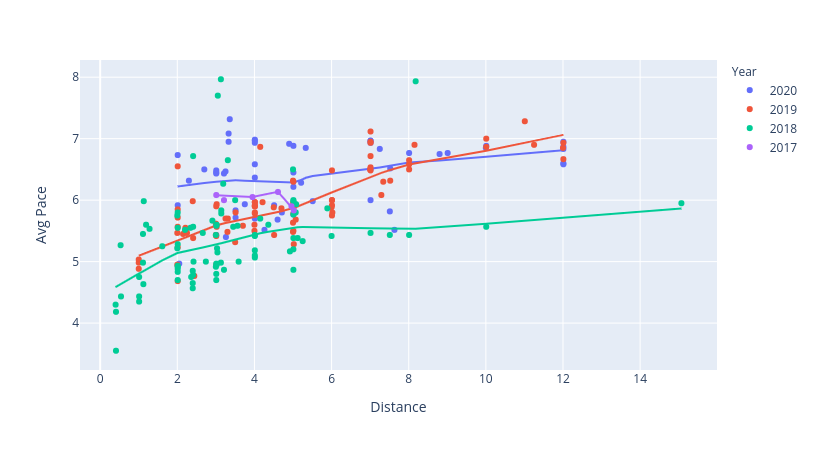

In [49]:
fig = px.scatter(running_df, x='Distance', y='Avg Pace', color='Year', trendline='lowess')
fig.show()

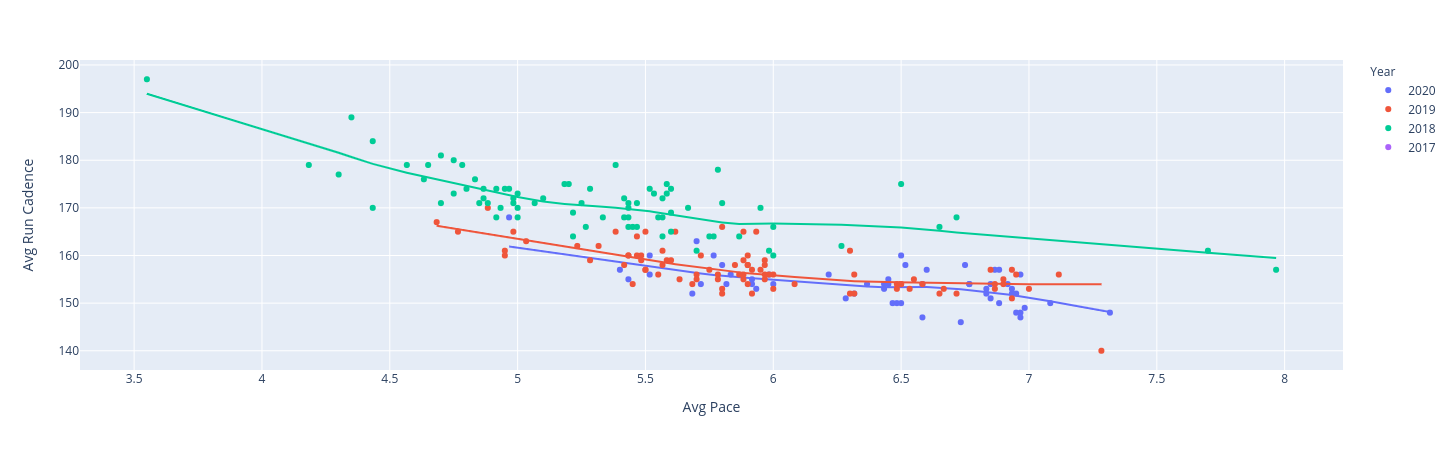

In [55]:
fig = px.scatter(running_df, x='Avg Pace', y='Avg Run Cadence', color='Year', trendline='lowess')
fig.show()

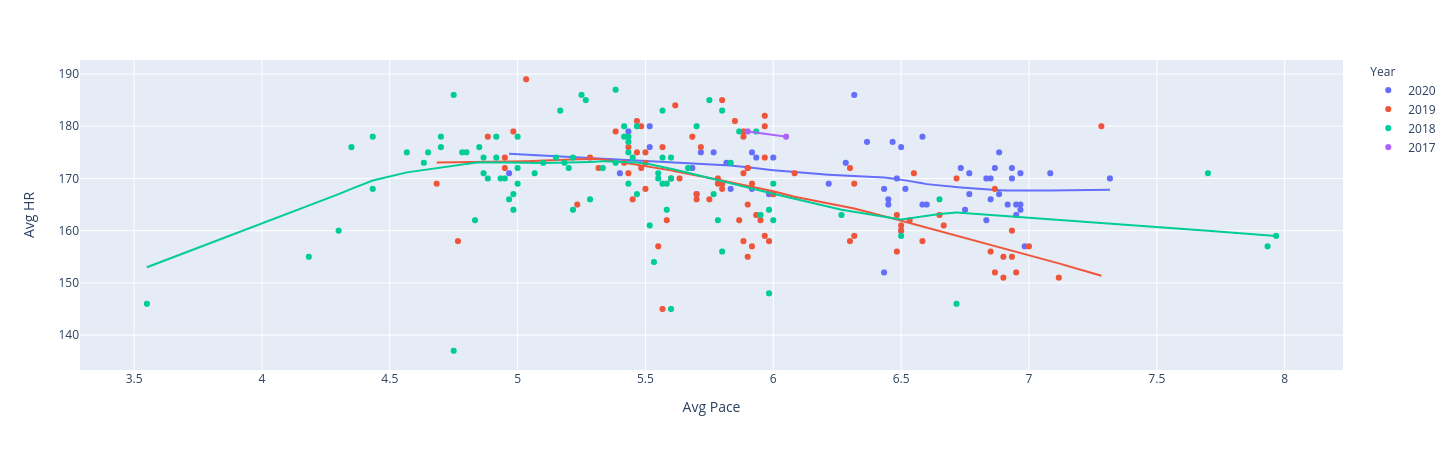

In [60]:
fig = px.scatter(running_df, x='Avg Pace', y='Avg HR', color='Year', trendline='lowess')
fig.show()

In [ ]:
table_tennis_df = df[df['Title'] == 'Table Tennis'].reset_index(drop=True)

table_tennis_df